In [43]:
import pandas as pd
import os
import numpy as np

In [7]:
from plotnine import *

### Load data and make a write function

In [8]:
os.getcwd()

'/Users/paulwyatt/Code/Kaggle/Playground/202308s3e21'

In [32]:
os.listdir()

['var_transform.ipynb',
 'submission.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv']

In [22]:
base_sub = pd.read_csv('sample_submission.csv', index_col=0)

In [23]:
base_sub.head()

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
id,,,,,,,,,,,,,,,,,,,,,
0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [24]:
def write_submission(sub, name='submission.csv'):
    sub.to_csv(name)

In [25]:
write_submission(base_sub)

In [28]:
written_sub = pd.read_csv('submission.csv', index_col=0)

In [31]:
written_sub.equals(base_sub)

True

### Data cleaning based on some of our investigation

In [57]:
df = base_sub.copy()
df.loc[2662,'NH4_5'] = max(df.loc[df.index != 2662, 'NH4_5'])

### Look at some graphs of the variables

/Users/paulwyatt/.local/share/virtualenvs/Code-1ZUeTjS5/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 179'. Pick better value with 'binwidth'.


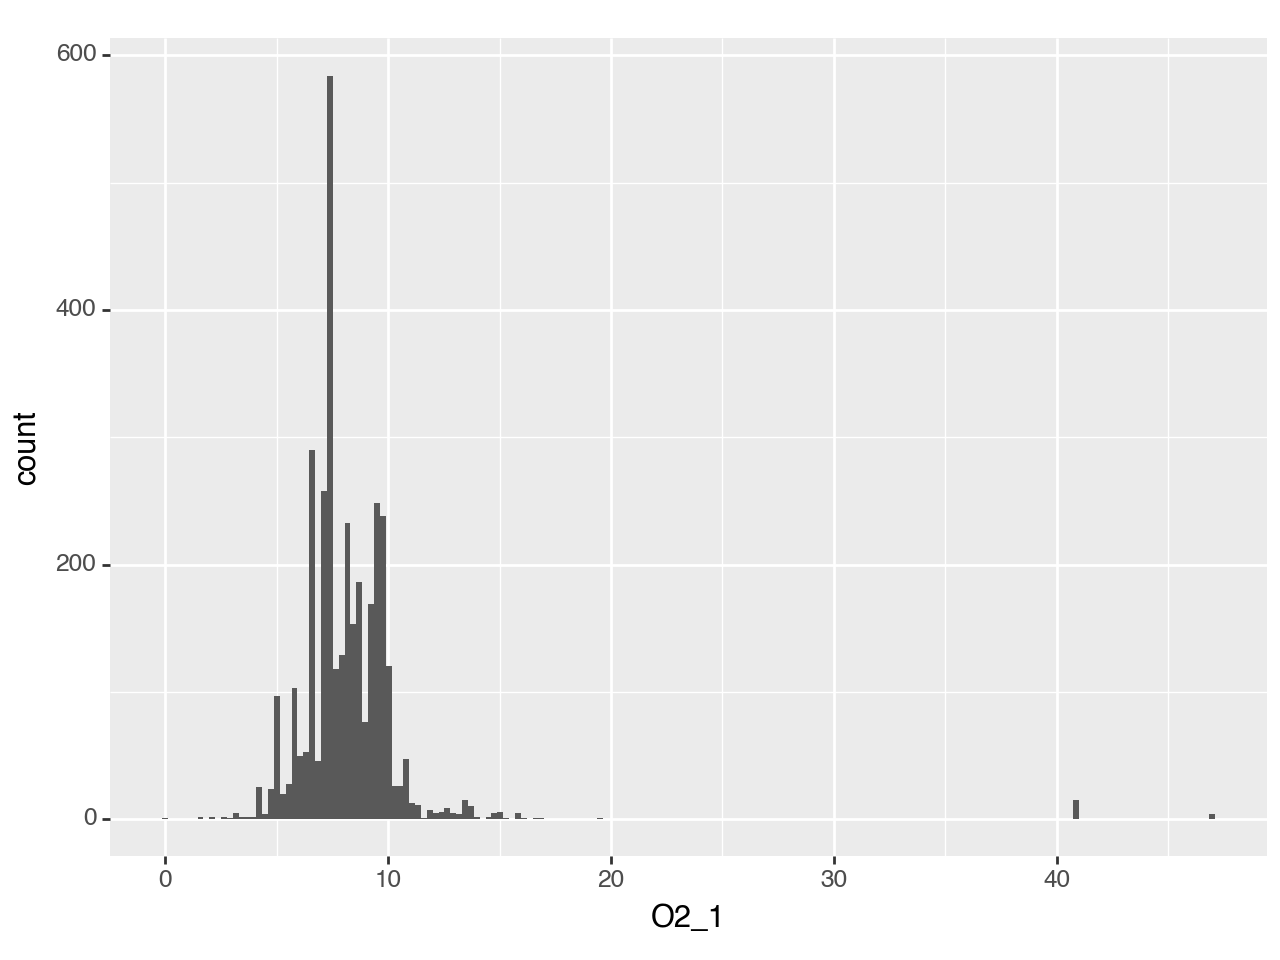

<Figure Size: (640 x 480)>

In [58]:
(
    ggplot(df) +
    geom_histogram(aes(x='O2_1'))
)

In [59]:
melted = pd.melt(df)

/Users/paulwyatt/.local/share/virtualenvs/Code-1ZUeTjS5/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 11116'. Pick better value with 'binwidth'.


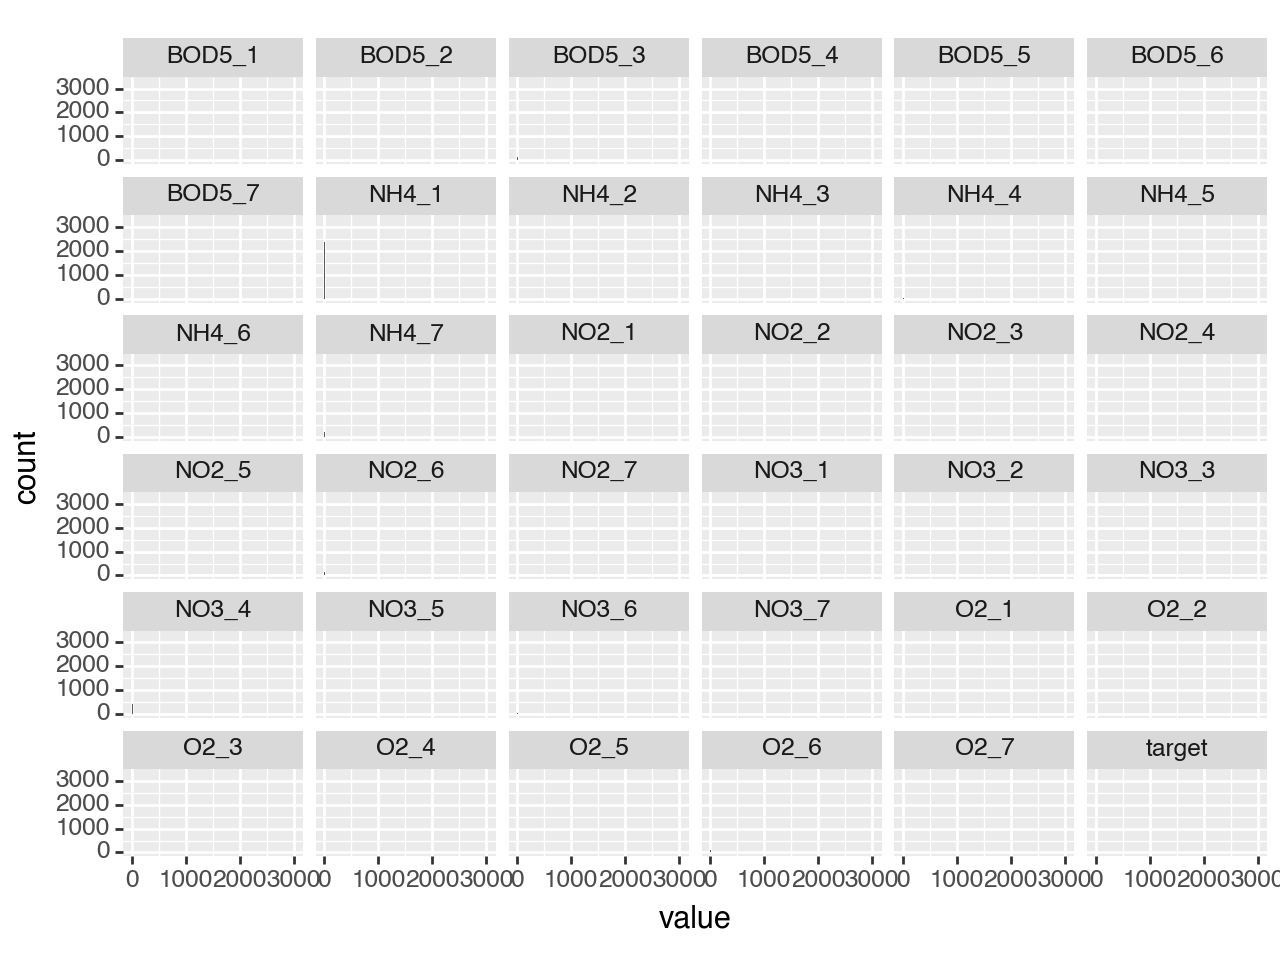

<Figure Size: (640 x 480)>

In [38]:
(
    ggplot(melted) +
    geom_histogram(aes(x='value')) +
    facet_wrap('variable')
)

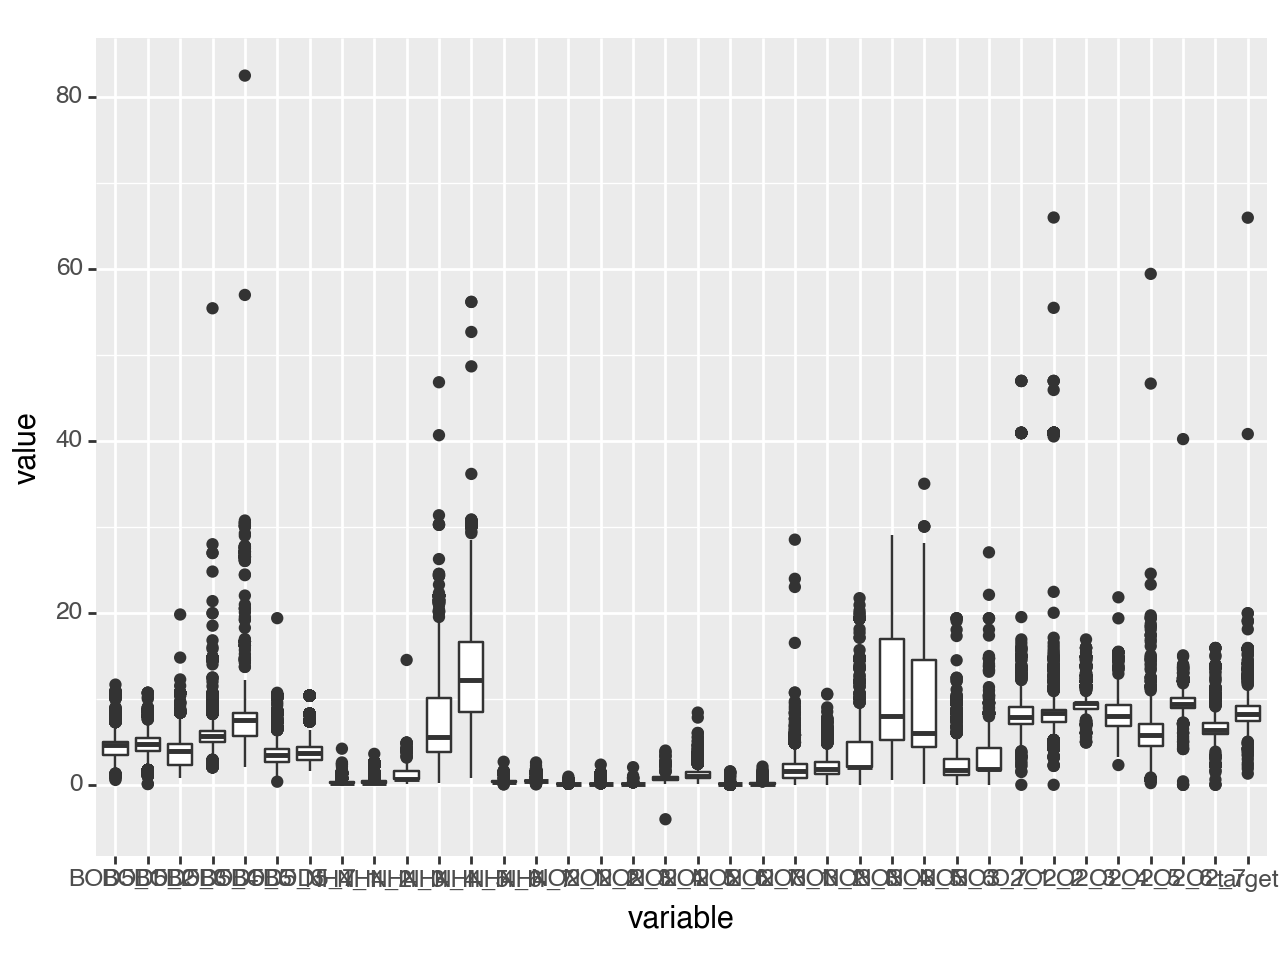

<Figure Size: (640 x 480)>

In [60]:
(
    ggplot(melted) +
    geom_boxplot(aes(x='variable', y='value'))
)
# here we find a ridiculous outlier

In [45]:
melted.iloc[np.where(melted.value > 1000)]

,variable,value
44662,NH4_5,3026.0


In [47]:
base_sub.iloc[np.where(base_sub['NH4_5']>1000)]

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
id,,,,,,,,,,,,,,,,,,,,,
2662,15.91,15.9,14.933,8.98,6.17,2.28,8.98,7.15,0.573,0.54,...,7.795,3.02,6.32,6.823,6.95,7.05,6.075,6.75,7.37,7.5


### Let's apply some basic transforms

Good all-variable transforms
 - fill missing values (mean imputation plus missingness marker)
 - box-cox
 - sqrt
 - normalize

Good variable interactions
  - x*y
  - x/y


In [ ]:
# Im pretty sure there's an ootb boxcox function in scipy but writing fro

### Write the dataframe for upload

In [61]:
write_submission(df)